In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

#spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder.master("local[10]").getOrCreate()
spark.sparkContext.setLogLevel("ERROR")

df = spark.read.parquet("parquet/run0029_mwdc.parquet")
df.select("dc31_x3_id","dc31_x3_charge").show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
26/01/13 14:20:20 WARN Utils: Your hostname, gpuana02, resolves to a loopback address: 127.0.1.1; using 192.168.1.216 instead (on interface enp4s0)
26/01/13 14:20:20 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
26/01/13 14:20:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
26/01/13 14:20:21 WARN RapidsPluginUtils: RAPIDS Accelerator 25.10.0 using cudf 25.10.0, private revision 28e7c65b3c0526baba384d9b97ee12e4d6766d9a
26/01/13 14:20:21 WARN RapidsPluginUtils: RAPIDS Accelerator is enabled, to disable GPU support set `spark.rapids.sql.enabled` to false.


+----------+--------------+
|dc31_x3_id|dc31_x3_charge|
+----------+--------------+
+----------+--------------+



In [2]:

from matplotlib import pyplot as plt
from hist.sparkHist2d import Hist2DArrays
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm

plane = "dc31_x1"
d, xedges, yedges = Hist2DArrays(df, [f"{plane}_id",f"{plane}_charge"],[16,500],[[-0.5,15.5],[0,250]],  interpolation='none', norm=LogNorm())
plt.show()

from hist.projection import ProjectionY
projH, projXedges = ProjectionY(d, xedges, yedges, 0, 1)
plt.show()

ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7ecc2bf72160> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 640x480 with 2 Axes>

Statistics:
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [2.00000e+00 2.39500e+04 1.40096e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [1.00000e+00 2.42110e+04 1.39836e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.00000e+00 4.00000e+00 1.55000e+02]
 [6.00000e+00 2.42010e+04 1.39682e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.00000e+00 2.00000e+00 7.10000e+01]
 [3.00000e+00 2.38430e+04 1.40129e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.00000e+00 0.00000e+00 5.00000e+00]
 [8.00000e+00 2.41270e+04 1.39908e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.00000e+00 0.00000e+00 4.00000e+00]
 [3.51000e+02 2.37350e+04 1.39958e+05]
 [0.00000e+00 0.00000e+00 0.00000e+00]]
Statistics:
[[0.0000e+00 0.0000e+00 9.0000e+00]
 [1.0000e+00 2.4008e+04 1.4003e+05]
 [0.0000e+00 0.0000e+00 0.0000e+00]]
Statistics:
[[0.0000e+00 7.0000e+00 1.2800e+02]
 [4.0000e+00 2.3999e+04 1.3991e+05]
 [0.0000e+00 0.

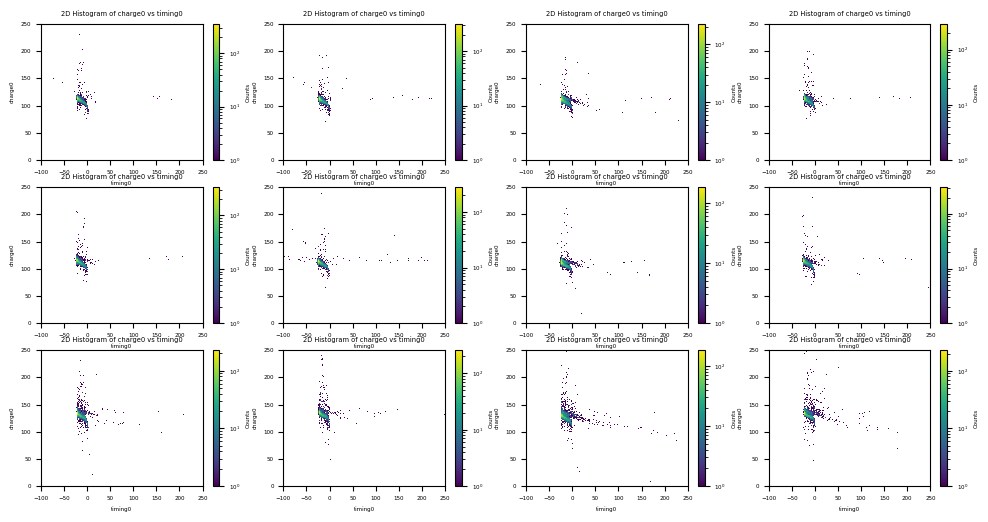

In [ ]:
planes = ['dc31_x1','dc31_x2','dc31_y1','dc31_y2','dc31_x3','dc31_x4','dc31_y3','dc31_y4','dc32_x1','dc32_x2','dc32_y1','dc32_y2']

from matplotlib import pyplot as plt
from hist.sparkHist2d import Hist2D
from hist.sparkHist1d import Hist1D
from matplotlib.colors import LogNorm

plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 4
for i, plane in enumerate(planes):
    q, mod = divmod(i,4)
    plt.subplot2grid((3,4),(q,mod))
    dfp = df.select(f"{plane}_id",f"{plane}_charge",f"{plane}_timing")
    dfp = dfp.withColumn("charge0",F.expr(f"element_at({plane}_charge, 1)")) \
             .withColumn("timing0",F.expr(f"element_at({plane}_timing,1)"))
    d = Hist2D(dfp, ["timing0","charge0"],[500,500],[[-100,250],[0,250]],  interpolation='none', norm=LogNorm())
plt.show()

Statistics:
[[      0.       0.       0.]
 [      0. 3267876.       0.]
 [      0.       0.       0.]]
Statistics:
[[      0.       0.       0.]
 [      0. 3263174.       0.]
 [      0.       0.       0.]]
Statistics:
[[0.000000e+00 1.610000e+02 0.000000e+00]
 [0.000000e+00 3.094649e+06 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
Statistics:
[[0.000000e+00 7.400000e+01 0.000000e+00]
 [0.000000e+00 3.096245e+06 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
Statistics:
[[0.000000e+00 5.000000e+00 0.000000e+00]
 [0.000000e+00 3.129159e+06 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
Statistics:
[[0.000000e+00 4.000000e+00 0.000000e+00]
 [0.000000e+00 3.267421e+06 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
Statistics:
[[0.000000e+00 9.000000e+00 0.000000e+00]
 [0.000000e+00 3.084437e+06 0.000000e+00]
 [0.000000e+00 0.000000e+00 0.000000e+00]]
Statistics:
[[0.000000e+00 1.400000e+02 0.000000e+00]
 [0.000000e+00 3.083743e+06 0.000000e+00]
 [0

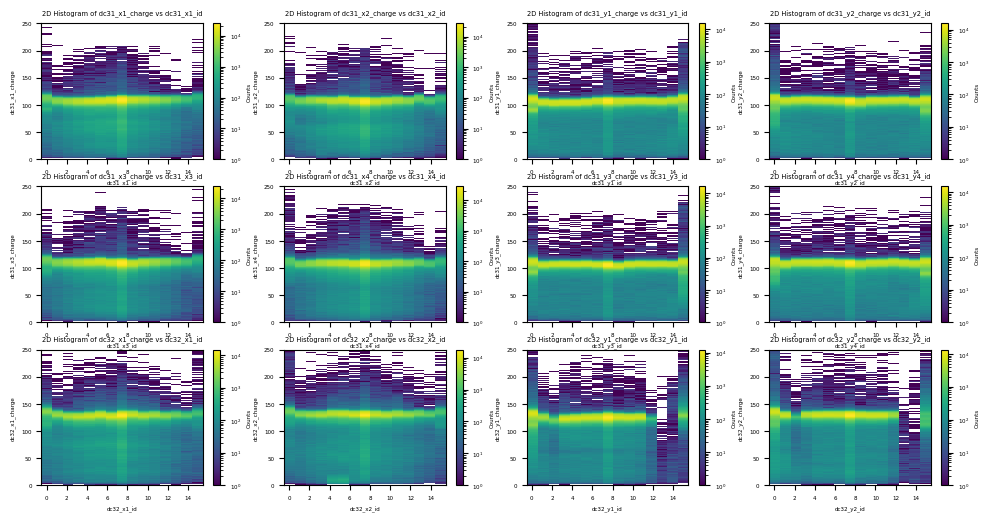

In [ ]:
from hist.sparkHist2d import Hist2DArrays

plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 4
for i, plane in enumerate(planes):
    q, mod = divmod(i,4)
    plt.subplot2grid((3,4),(q,mod))
    dfp = df.select(f"{plane}_id",f"{plane}_charge")
    d = Hist2DArrays(dfp, [f"{plane}_id",f"{plane}_charge"],[17,500],[[-0.5,15.5],[0,250]],  interpolation='none', norm=LogNorm())
plt.show()

Statistics:
[[   0.    0.    0.]
 [   0. 5979.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 6003.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 5915.    0.]
 [   0.    0.    0.]]
Statistics:
[[   0.    0.    0.]
 [   0. 5982.    0.]
 [   0.    0.    0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 10735.     0.]
 [    0.     0.     0.]]
Statistics:
[[    0.     0.     0.]
 [    0. 11413.     0.]
 [    0.     0.     0.]]


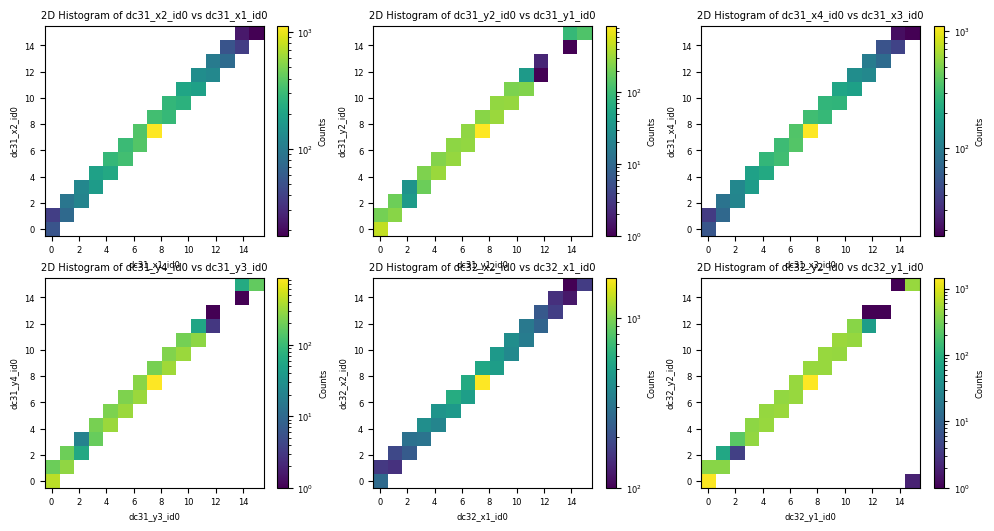

In [ ]:
ppaires = [("dc31_x1","dc31_x2"),("dc31_y1","dc31_y2"),("dc31_x3","dc31_x4"),("dc31_y3","dc31_y4"),("dc32_x1","dc32_x2"),("dc32_y1","dc32_y2")]

plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 6
for i, pair in enumerate(ppaires):
    q, mod = divmod(i,3)
    plt.subplot2grid((2,3),(q,mod))
    dfp = df.select(f"{pair[0]}_id",f"{pair[1]}_id").filter(F.expr(f"array_size({pair[0]}_id)==1")).filter(F.expr(f"array_size({pair[1]}_id)==1"))
    dfp = dfp.withColumn(f"{pair[0]}_id0",F.expr(f"element_at({pair[0]}_id, 1)")).withColumn(f"{pair[1]}_id0",F.expr(f"element_at({pair[1]}_id, 1)"))
    d = Hist2D(dfp, [f"{pair[0]}_id0",f"{pair[1]}_id0"],[16,16],[[-0.5,15.5],[-0.5,15.5]],  interpolation='none', norm=LogNorm())
plt.show()

Statistics:
[[1.00000e+01 9.60000e+01 2.46900e+03]
 [2.60000e+01 2.36830e+04 1.37763e+05]
 [0.00000e+00 1.00000e+00 0.00000e+00]]
Statistics:
[[1.00000e+01 8.30000e+01 2.07800e+03]
 [3.00000e+01 2.39340e+04 1.37904e+05]
 [0.00000e+00 7.00000e+00 2.00000e+00]]
Statistics:
[[2.00000e+00 1.03000e+02 2.53300e+03]
 [8.00000e+00 2.37200e+04 1.37679e+05]
 [0.00000e+00 1.00000e+00 2.00000e+00]]
Statistics:
[[2.00000e+00 1.31000e+02 2.76400e+03]
 [3.00000e+00 2.35260e+04 1.37613e+05]
 [0.00000e+00 9.00000e+00 0.00000e+00]]
Statistics:
[[2.00000e+00 9.60000e+01 2.41700e+03]
 [9.00000e+00 2.38600e+04 1.37633e+05]
 [0.00000e+00 3.10000e+01 0.00000e+00]]
Statistics:
[[3.20000e+01 1.17000e+02 3.49400e+03]
 [4.31000e+02 2.30540e+04 1.36672e+05]
 [0.00000e+00 2.38000e+02 1.00000e+01]]
Statistics:
[[0.00000e+00 9.30000e+01 2.20800e+03]
 [4.00000e+00 2.34940e+04 1.38198e+05]
 [0.00000e+00 4.60000e+01 5.00000e+00]]
Statistics:
[[3.00000e+00 7.30000e+01 1.74800e+03]
 [4.00000e+00 2.34680e+04 1.38456e+05]


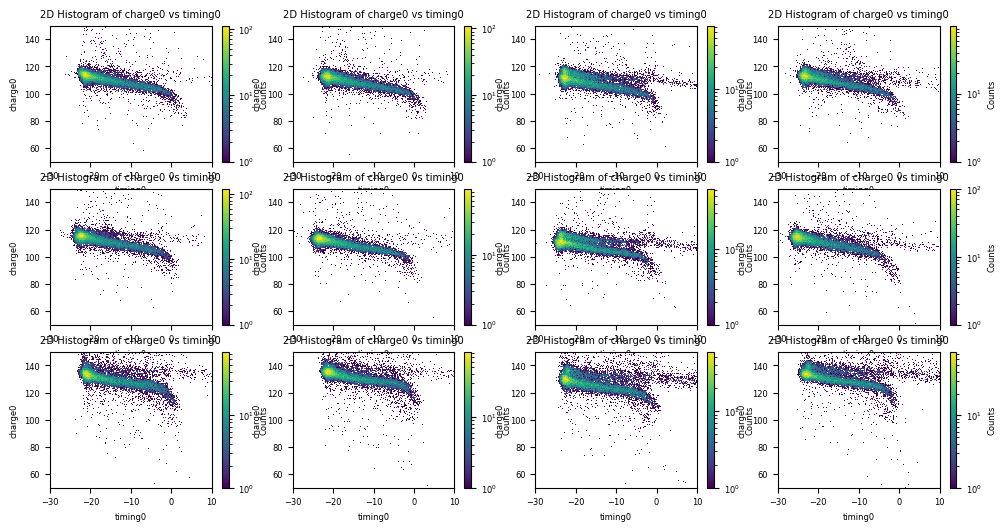

In [ ]:
plt.figure(0, figsize=(12,6))
plt.rcParams["font.size"] = 6
for i, plane in enumerate(planes):
    q, mod = divmod(i,4)
    plt.subplot2grid((3,4),(q,mod))
    dfp = df.select(f"{plane}_id",f"{plane}_charge",f"{plane}_timing")
    dfp = dfp.withColumn("charge0",F.expr(f"element_at({plane}_charge, 1)")) \
             .withColumn("timing0",F.expr(f"element_at({plane}_timing,1)"))
    d = Hist2D(dfp, ["timing0","charge0"],[200,200],[[-30,10],[50,150]],  interpolation='none', norm=LogNorm())
plt.show()